미국 아이오와 주의 에임스 지방의 주택가격 정보

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Q. 상기 데이터로 아래 사항에 유의하여 다음 사항을 수행하세요.

LinearRegression, Ridge, Lasso를 이용하여 모델링 및 평가
평가는 RMSLE(가격이 비싼 주택일수록 예측 결과 오류가 전체 오류에 미치는 비중이 높은 것을 상쇄하기 위하여 오류 값을 로그 변환하여 평가)
Null이 많은 컬럼과 불필요한 컬럼 삭제
삭제하지 않은 숫자형 컬럼은 평균값으로 대체
문자형 피처는 원-핫인코딩으로 변환

피처별 회귀 계수 시각화 및 모델별 비교
교차검증 수행 후 모델별 비교 - cross_val_score 이용
각 모델별 평가 결과 비교 분석 및 개선 방안 기술

Ridge와 Lasso 모델에 대하여 하이퍼 파라미터 튜닝하면서 최적 값 도출 후 학습/예측/평가 수행 및 회귀 계수 시각화

피처 데이터 세트의 분포도 검토 후 로그 변환 및 종속변수와 상관관계가 높은 독립변수의 이상치를 제거 후 학습/예측/평가 수행 및 시각화
회귀 트리 모델을 이용해 학습/예측/평가 수행 및 피처 중요도 시각화

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_org = pd.read_csv('dataset/house_price.csv')
df = df_org.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
print('data shape: ',df.shape)
print('\n전체 피쳐 type:\n',df.dtypes.value_counts())
isnull_series = df.isnull().sum()
print('\nNull칼럼, 갯수 :\n',isnull_series[isnull_series>0].sort_values(ascending=False))

data shape:  (1460, 81)

전체 피쳐 type:
 object     43
int64      35
float64     3
dtype: int64

Null칼럼, 갯수 :
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

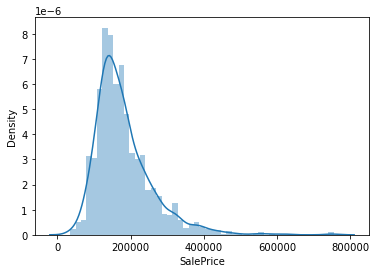

In [12]:
sns.distplot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

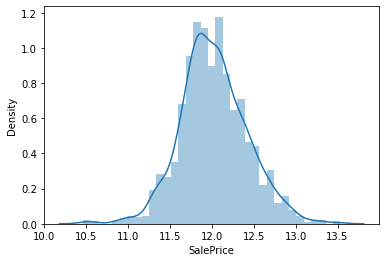

In [13]:
# 로그변환 종속변수
sns.distplot(np.log1p(df['SalePrice']))

In [14]:
## saleprice => log변환

org_saleprice = df['SalePrice']
df['SalePrice'] = np.log1p(df['SalePrice'])

# drop & fillna

df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1, inplace=True)
df.fillna(df.mean(),inplace=True)

In [15]:
# 문자열 컬럼들 one-hot encoding

df_ohe = pd.get_dummies(df)
print(df.shape, df_ohe.shape)

(1460, 75) (1460, 271)


In [16]:
# 평가함수

from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE: ', np.round(rmse,3))
    
    return rmse
    
def get_rmses(models):
    rmse_list = []
    for model in models:
        rmse = get_rmse(model)
        rmse_list.append(rmse)
    return rmse_list

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

y = df_ohe['SalePrice']
X = df_ohe.drop('SalePrice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

# lr, Ridge, Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)


models = [lr_reg, ridge, lasso]

get_rmses(models)

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.128
Lasso 로그 변환된 RMSE:  0.176


[0.13189576579154055, 0.12750846334053145, 0.17628250556471395]

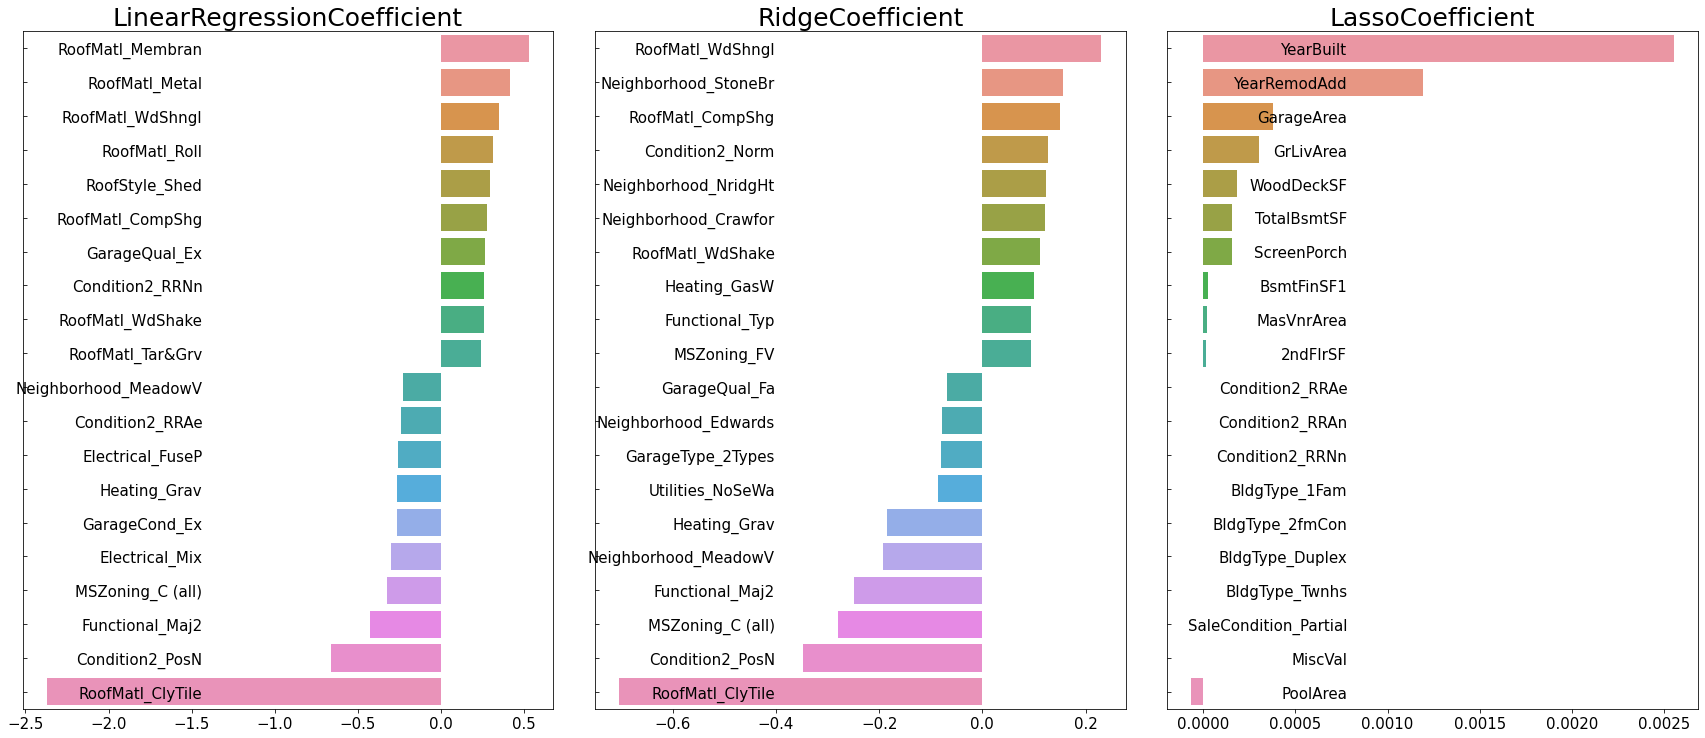

In [28]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_ , index=X.columns)
    
    # 상위 10개, 하위 10개의 회귀 계수 추출 반환
    high = coef.sort_values(ascending=False).head(n)
    low = coef.sort_values(ascending=False).tail(n)
    
    return high,low



def visualize_coefficient(models):
    
    fig, axs = plt.subplots(figsize=(24,10), nrows=1 , ncols = 3)
    fig.tight_layout()
    
    for i_num , model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+'Coefficient', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-180)
        
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(15)
            
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge, lasso]

visualize_coefficient(models)



In [29]:
from sklearn.model_selection import cross_val_score

def get_rmse_cv(models):
    
    for model in models:
        rmse_list = np.sqrt(-1 * cross_val_score(model, X, y , scoring='neg_mean_squared_error', cv=5))
        
        rmse_avg = np.mean(rmse_list)
        
        print('\n{} RMSE 값 리스트{} : '.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{} 평균 RMSE : {}' .format(model.__class__.__name__, np.round(rmse_avg,3)))

models = [lr_reg, lasso, ridge]
get_rmse_cv(models)


LinearRegression RMSE 값 리스트[1.350000e-01 2.467683e+03 1.680000e-01 1.110000e-01 1.980000e-01] : 
LinearRegression 평균 RMSE : 493.659

Lasso RMSE 값 리스트[0.161 0.204 0.177 0.181 0.265] : 
Lasso 평균 RMSE : 0.198

Ridge RMSE 값 리스트[0.117 0.154 0.142 0.117 0.189] : 
Ridge 평균 RMSE : 0.144


In [30]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params,
                             scoring = 'neg_mean_squared_error',cv=5)
    
    grid_model.fit(X, y)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    
    print('{} cv=5 시 최적 평균 RMSE값: {}, 최적 alpha={}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))
    
ridge_params = { 'alpha':[0.05, 0.1, 1 , 5 , 8 , 10 , 12 , 15 , 20]}
lasso_params = { 'alpha':[0.001,0.005,0.008, 0.05, 0.03, 0.1, 0.5, 1, 5 , 10]}

print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_params)

Ridge cv=5 시 최적 평균 RMSE값: 0.1418, 최적 alpha={'alpha': 12}
Lasso cv=5 시 최적 평균 RMSE값: 0.142, 최적 alpha={'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.12


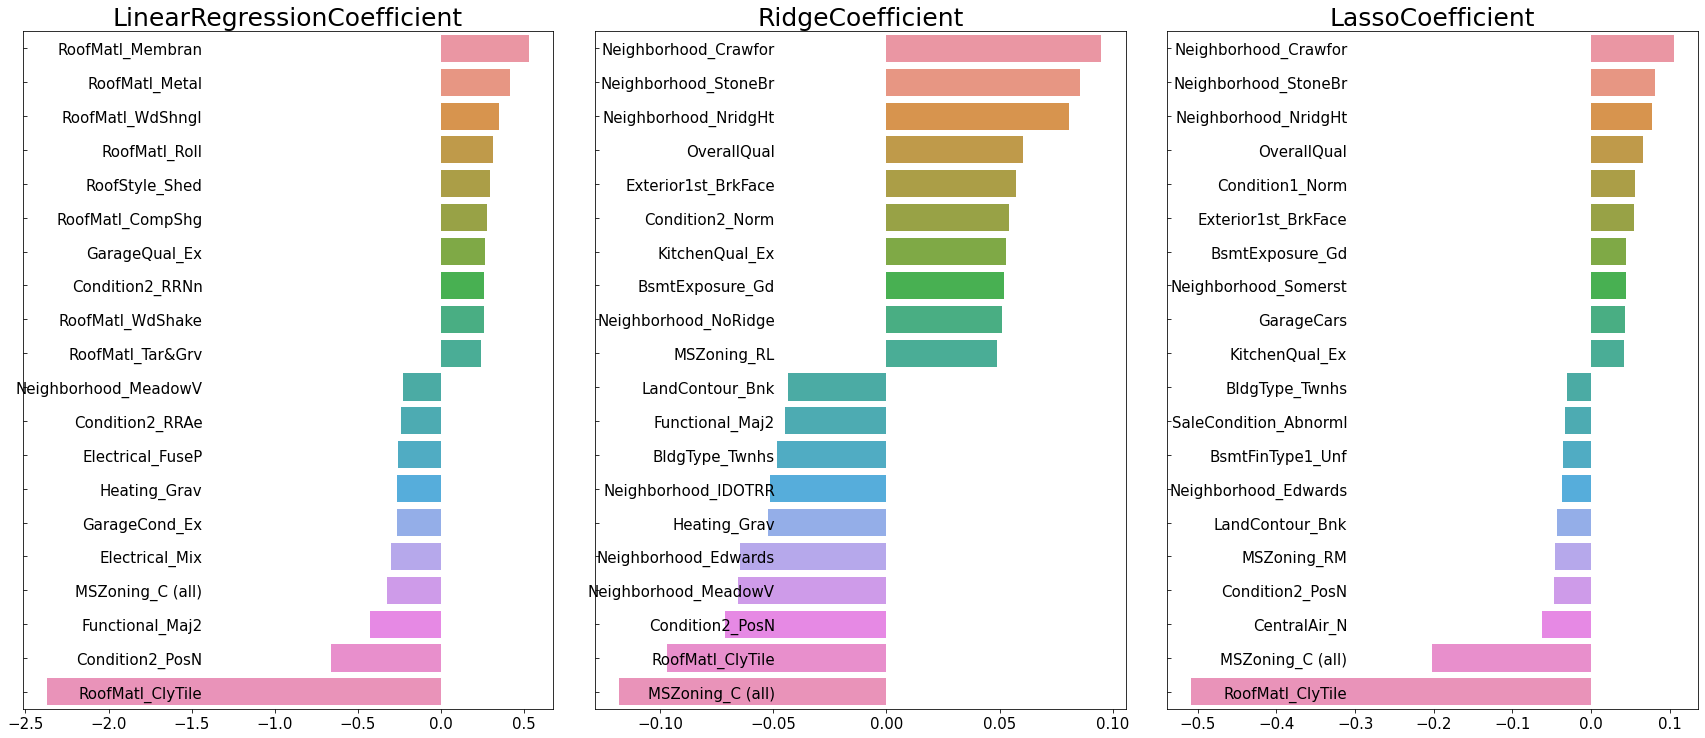

In [31]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge = Ridge(alpha=12)
ridge.fit(X_train,y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

models = [lr_reg, ridge, lasso]

get_rmses(models)
visualize_coefficient(models)

In [32]:
from scipy.stats import skew

index_features = df.dtypes[df.dtypes != object].index
index_features

skew_features = df[index_features].apply(lambda x : skew(x))
skew_top = skew_features[skew_features>1]
print(skew_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [33]:
df[skew_top.index] = np.log1p(df[skew_top.index])

In [35]:
ohe_df = pd.get_dummies(df) # 데이터프레임 재정의

y = ohe_df['SalePrice']
X = ohe_df.drop('SalePrice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1 , 5 , 8 , 10 , 12 , 15 , 20]}
lasso_params = { 'alpha':[0.001,0.005,0.008, 0.05, 0.03, 0.1, 0.5, 1, 5 , 10]}

print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_params)

Ridge cv=5 시 최적 평균 RMSE값: 0.1275, 최적 alpha={'alpha': 10}
Lasso cv=5 시 최적 평균 RMSE값: 0.1252, 최적 alpha={'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  0.128
Ridge 로그 변환된 RMSE:  0.122
Lasso 로그 변환된 RMSE:  0.119


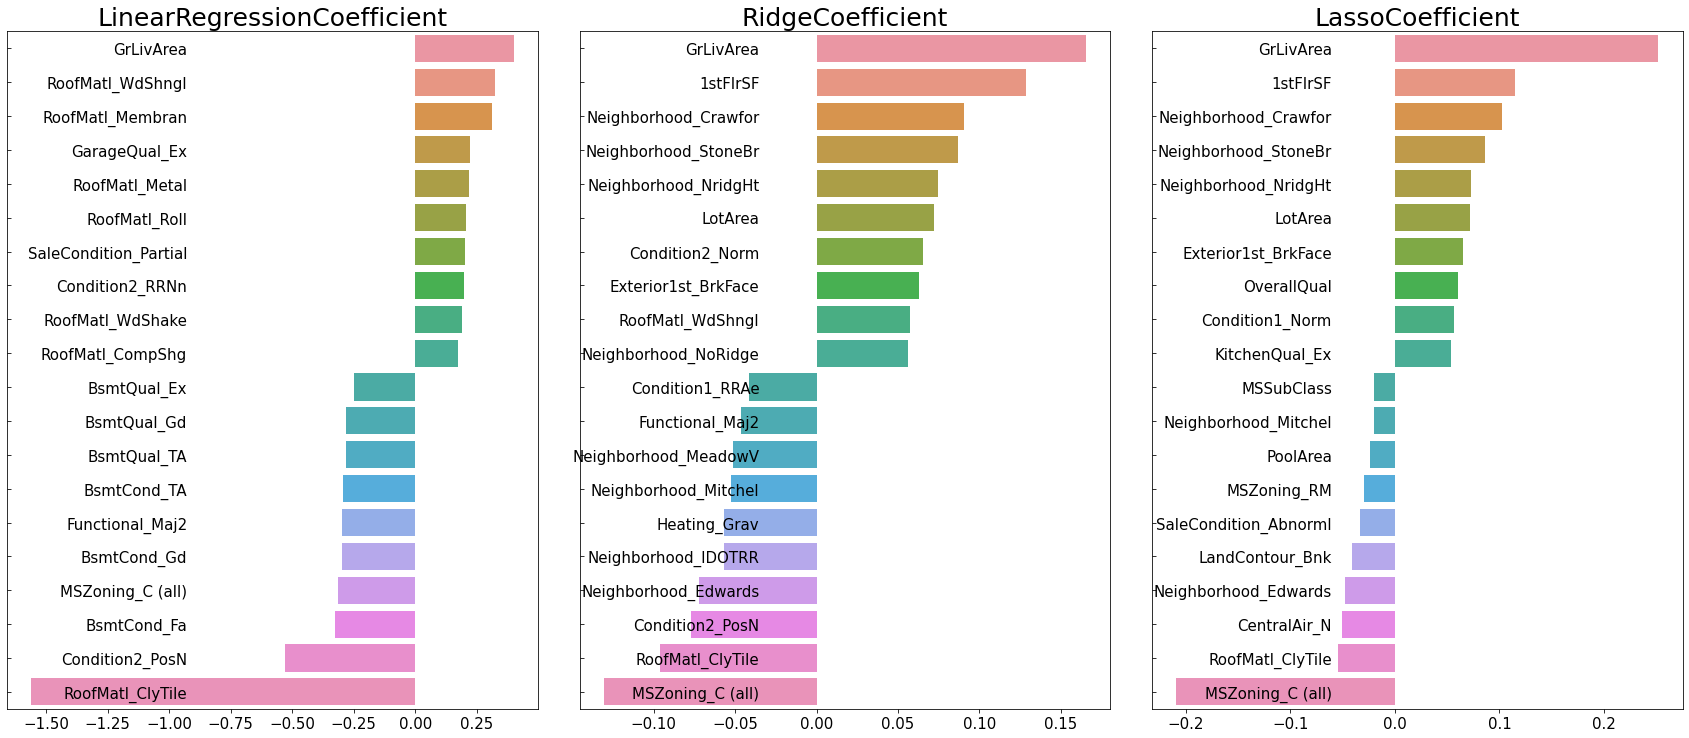

In [36]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

models = [lr_reg, ridge, lasso]

get_rmses(models)
visualize_coefficient(models)

Text(0.5, 0, 'GrLivArea')

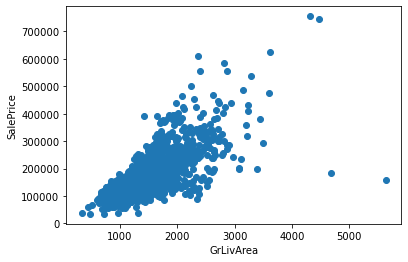

In [37]:
plt.scatter(x=df_org.GrLivArea, y=df_org.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')

In [38]:
cond1 = ohe_df['GrLivArea'] > np.log1p(4000)
cond2 = ohe_df['SalePrice'] < np.log1p(500000)

outlier_index = ohe_df[cond1 & cond2].index

print('이상치 레코드 index : ', outlier_index.values)
print('이상치 삭제 전 shape : ', ohe_df.shape)

ohe_df.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 shape : ', ohe_df.shape)

이상치 레코드 index :  [ 523 1298]
이상치 삭제 전 shape :  (1460, 271)
이상치 삭제 후 shape :  (1458, 271)


In [40]:
y = ohe_df['SalePrice']
X = ohe_df.drop('SalePrice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1 , 5 , 8 , 10 , 12 , 15 , 20]}
lasso_params = { 'alpha':[0.001,0.005,0.008, 0.05, 0.03, 0.1, 0.5, 1, 5 , 10]}

print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_params)

Ridge cv=5 시 최적 평균 RMSE값: 0.1125, 최적 alpha={'alpha': 8}
Lasso cv=5 시 최적 평균 RMSE값: 0.1122, 최적 alpha={'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  0.105
Ridge 로그 변환된 RMSE:  0.103
Lasso 로그 변환된 RMSE:  0.096


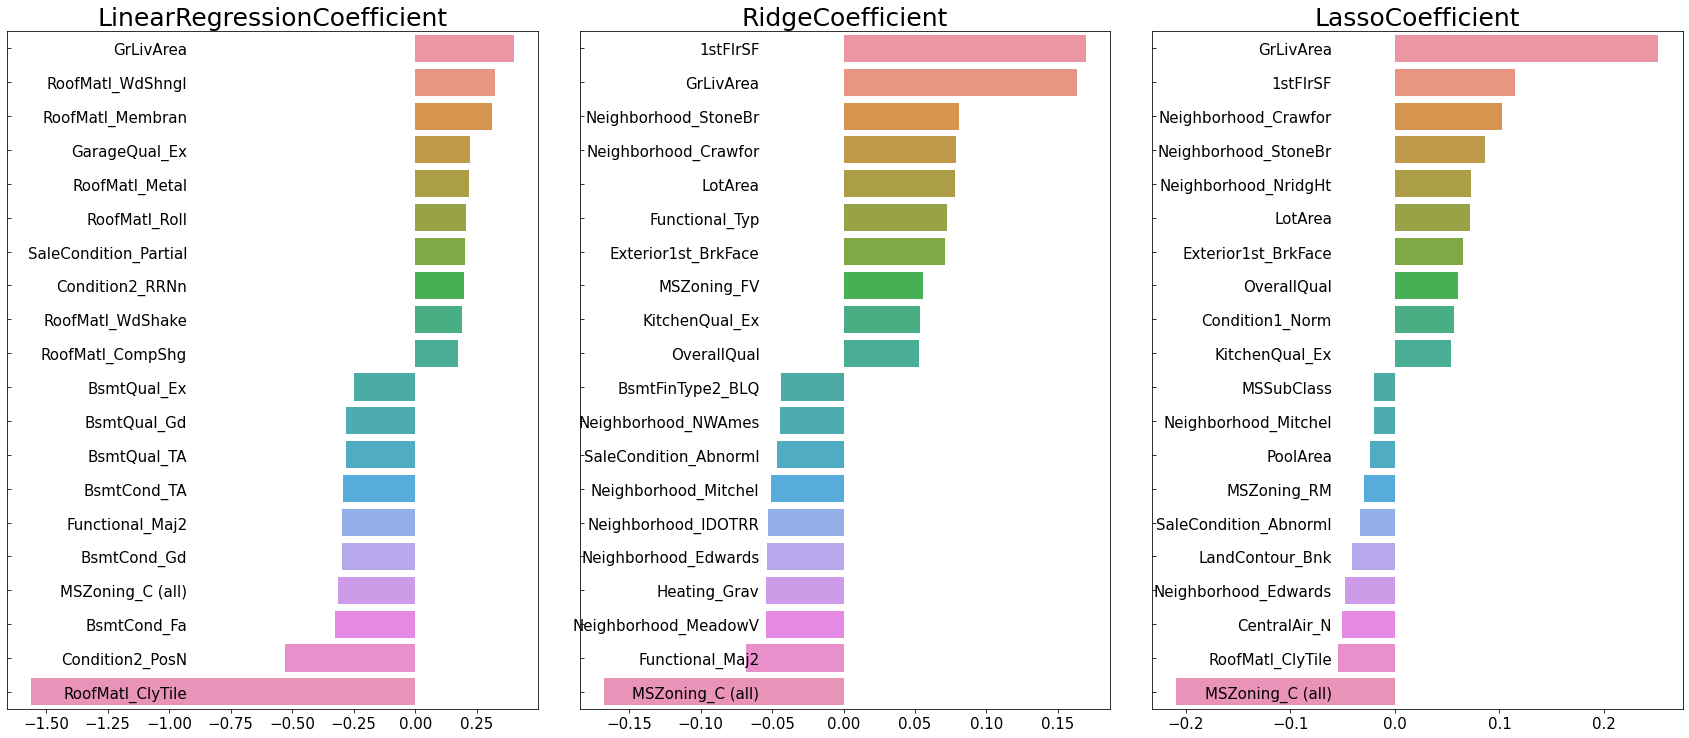

In [44]:
ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)

models = [lr_reg, ridge, lasso]

get_rmses(models)
visualize_coefficient(models)

In [53]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}

xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)

best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor cv=5 시 최적 평균 RMSE값: 0.1178, 최적 alpha={'n_estimators': 1000}


In [82]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}

lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate=0.05, num_leaves=4,
                        subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs= -1)

best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor cv=5 시 최적 평균 RMSE값: 0.1163, 최적 alpha={'n_estimators': 1000}


In [89]:
from sklearn.metrics import mean_squared_error

def get_rmse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    model_name = model.__class__.__name__
    print(f'{model_name} RMSLE: {rmse:.3f}')
    
models = [lgbm_reg, xgb_reg]

for i in models:
    get_rmse(i , X_train, X_test, y_train, y_test)

LGBMRegressor RMSLE: 0.104
XGBRegressor RMSLE: 0.107


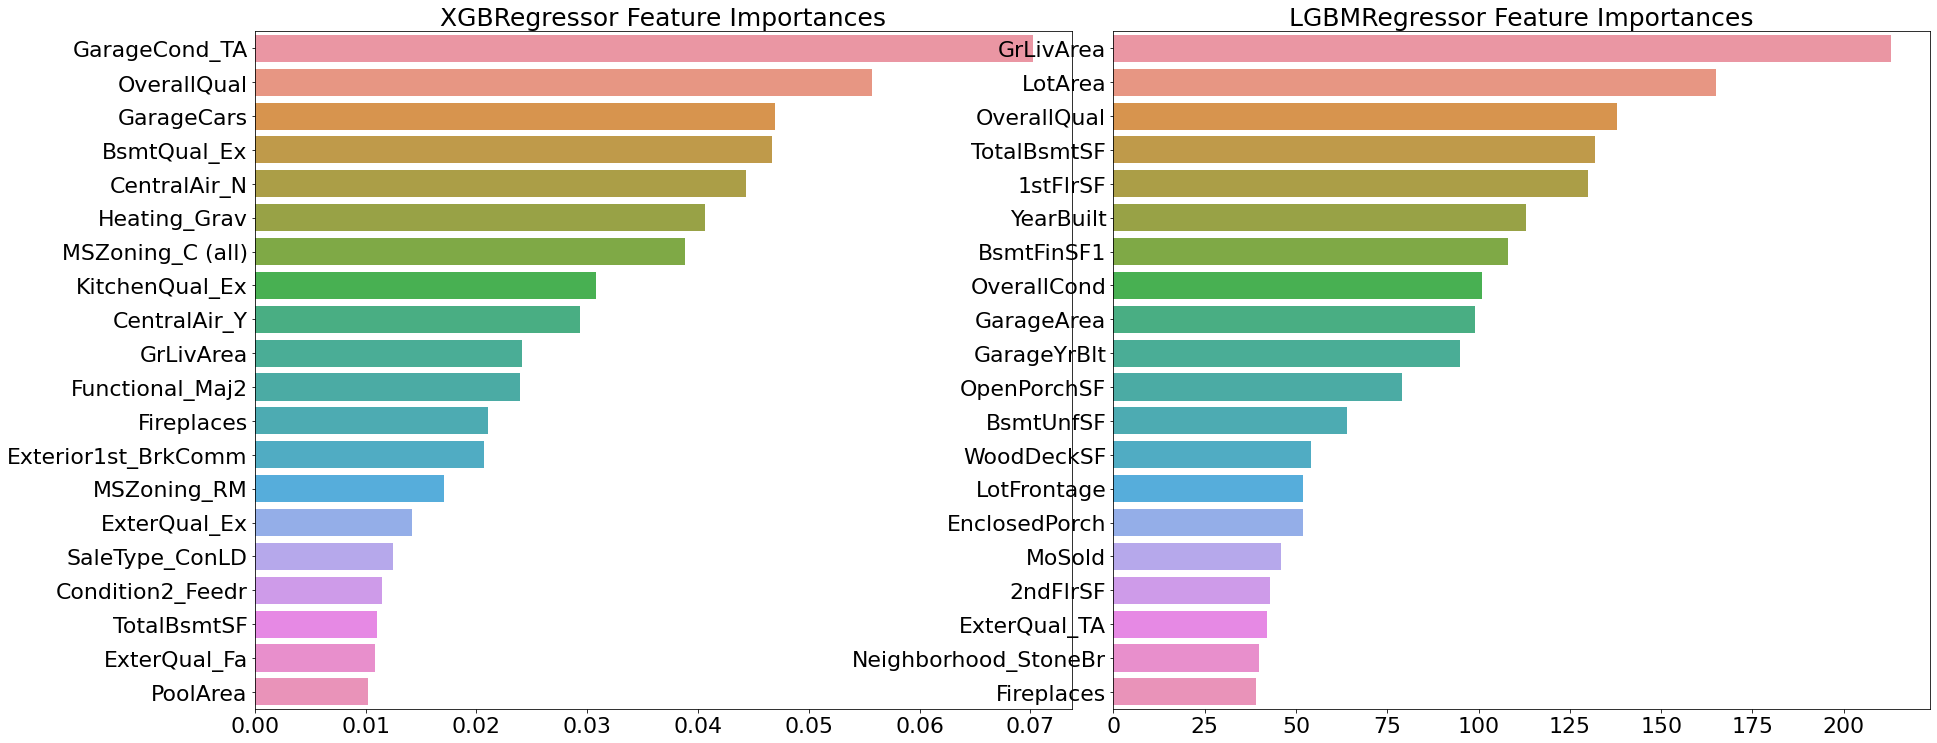

In [98]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [xgb_reg, lgbm_reg]
visualize_ftr_importances(models)